# Exercise 2

Consider the heat equation with Dirichlet boundary conditions on a domain $\Omega = (0,1)^d$ with $d\in\mathbb{N}$, and some initial value $u_0 : \overline\Omega \to \mathbb{R}$ for $t=0$.

\begin{alignat*}{2}
	\partial_t u(t,x) - \Delta_x u(t,x)  &=  0 \qquad &&\text{for } \; (t,x)\in(0,T)\times\Omega, \\
	u(0,x) &= u_0(x) \qquad &&\text{for} \; x \in \overline\Omega \\
	u(t,x) &= g(t,x) \qquad &&\text{for} \; t \in [0,T] \times \partial \Omega
\end{alignat*}

Here $g:[0,T]\times\partial \Omega\to\mathbb{R}$ denotes the values on the boundary, and we assume that $u_0 \equiv g(0,\cdot)$ holds on $\partial \Omega$.

The goal of the rest of the exercise is to implement the numerical solution of the heat equation.
Instead of applying a finite difference scheme to all variables, we will first discretize the space variable $x\in\mathbb{R}^d$, and then compute the <b>exact</b> solution of the resulting linear ODE.
The resulting linear ODE will be of the form $\partial_tu_h+L_hu_h=0$, where $u_h:(0,T)\times\Omega_h\to\mathbb R$ is a function of continuous time and discrete space.

## Part c)

Complete the function laplace_matrix, that discretizes the BVP with respect to space, by returning the matrix $L_h\in\mathbb R^{N,N}$ that defines the ODE.

In [5]:
import numpy as np
import scipy as sp
%matplotlib qt
from scipy.sparse import diags
# Do not use scipy.sparse.linalg.expm !
from scipy.sparse.linalg import expm_multiply

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



def laplace_matrix( n ):
    h = 1/(n+1) #step size
    L_h = np.zeros((n,n)) #generate a n*n zero matrix
    e1 = -1   # index of the first element equal to 1 in the first row
    e2 = -n   # index of the element equal to -2 in the first row
    e3 = -n+1 # index of the second element equal to 1 in the first row
    for i in range(n):
        L_h[i,e1+i]=1  #element equal to 1 in i row
        L_h[i,e2+i]=-2 #element equal to -2 in i row
        L_h[i,e3+i]=1  #element equal to 1 in i row
    L_h[0,n-1]=0
    L_h[n-1,0]=0
    L_h = -L_h/(h**2)
    return L_h  

## Part f)

Let $N=100$ and
\begin{gather*}
		u_0(x) := \left\{ \begin{array}{ll} 1 \qquad & \text{for} \; \left|x - \frac{1}{2}\right| < 10^{-1} \\ 0 \qquad & \text{else} \end{array}\right.
\end{gather*}

Compute the solution to the heat equation for logarithmic equidistant spaced time steps $10^{-5} = t_1, \dots, t_{19} = 10^{-2}$. Plot the result as a surface plot (including $t_0 = 0$). In another figure, plot $u(t_i,\cdot)$ as a normal one dimensional function for $i=0,\ldots,19$.
- Although the times $t_1,\ldots,t_{19}$ are defined with a logarithmic scale, the plots should have the linear scale.
- One can use "scipy.sparse.linalg.expm" to compute the matrix exponential in Python. To compute the product $\exp(At)b$, it is actually more efficient to use a dedicate function like "scipy.sparse.linalg.expm_multiply" instead.

In [6]:
n = 100

h = 1/(n+1) #step size
x_h = [(i+1)/(n+1) for i in range(n)] #space grid (without boundary)
tlog = np.logspace(-5,-2,num=19) #time grid (without initial t)
tlog = np.insert(tlog,0,0)
L_h = laplace_matrix(n) #get L_h

#Construct u_0(x_i)
u_0 = np.zeros((n,1)) # n*1 vector
for j in range(len(u_0)):
    if abs(x_h[j]-0.5) < 0.1:
        u_0[j] = 1  #When |x-1/2|<10^-1 u_0(x)=1 otherwise u_0(x)=0

#Construct u_h(t,x_i). The solution u_h(t,x_i)=exp(L_h t)u_0(x_i) (assume that g=0)
u_h = np.zeros(shape=(len(tlog),n)) #initialize u_h
for k in range(len(tlog)):
    L_ht = -L_h * tlog[k]  #L_h * t 
    u_h[k] = expm_multiply(L_ht,u_0).T #exp(L_h t)u_0(x_i)
    
#Add the boundary value
bv = np.zeros((1,len(tlog))) #all boundary values are 0
x_h.insert(0,0)
x_h.append(1) 
u_h = np.insert(u_h,0,bv,axis=1) #insert 0 into u_h    
u_h = np.insert(u_h,u_h.shape[1]-1,bv,axis=1)    
    
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_h, tlog, u_h, 200)
ax.set_xlabel('x_h')
ax.set_ylabel('t')
ax.set_zlabel('u_h');
plt.title('Surface Plot of the solution u_h')

fig = plt.figure()
for i in range(len(tlog)):
    plt.plot(x_h,u_h[i])
plt.xlabel('x_h')
plt.ylabel('u_h')
plt.title('plot of u(ti,·) for i = 0,...,19')

Text(0.5, 1.0, 'plot of u(ti,·) for i = 0,...,19')

In [2]:
len(x_h)

100

## Part f)

Let $N=100$ and
\begin{gather*}
		u_0(x) := \left\{ \begin{array}{ll} 1 \qquad & \text{for} \; \left|x - \frac{1}{2}\right| < 10^{-1} \\ 0 \qquad & \text{else} \end{array}\right.
\end{gather*}

Compute the solution to the heat equation for logarithmic equidistant spaced time steps $10^{-5} = t_1, \dots, t_{19} = 10^{-2}$. Plot the result as a surface plot (including $t_0 = 0$). In another figure, plot $u(t_i,\cdot)$ as a normal one dimensional function for $i=0,\ldots,19$.
- Although the times $t_1,\ldots,t_{19}$ are defined with a logarithmic scale, the plots should have the linear scale.
- One can use "scipy.sparse.linalg.expm" to compute the matrix exponential in Python. To compute the product $\exp(At)b$, it is actually more efficient to use a dedicate function like "scipy.sparse.linalg.expm_multiply" instead.


Plot in a third figure the quantity

\begin{gather*}
	H_h(t) := \frac{h}{2}\sum_{i=1}^N u_h(t,x_i)^2,
\end{gather*}

along the previously computed simulation, against the time $t$.

Text(0.5, 1.0, 'Plot of H_h(t)')

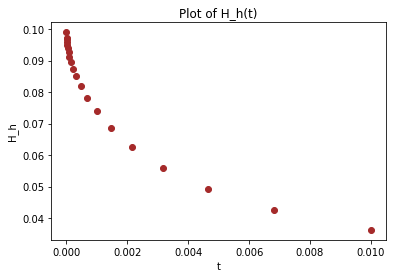

In [203]:
def Hh( u ):
    return (h/2)*sum(u**2)

# Your code
h = 1/(n+1) #step size
for l in range(len(tlog)):
    plt.scatter(tlog[l],Hh(u_h[l]),c='brown')
plt.xlabel('t')
plt.ylabel('H_h')
plt.title('Plot of H_h(t)')